In [23]:
import numpy as np
import matplotlib.pyplot as plt
x_train = np.array([1.0,2.0])  # x_train is input variable
y_train = np.array([300.0,500.0])  # y_train is the target
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")
print(f"x_train.shape = {x_train.shape}")
print(f"Number of training example = {x_train.shape[0]}")
print(f"Number of training example = {len(x_train)}")

x_train = [1. 2.]
y_train = [300. 500.]
x_train.shape = (2,)
Number of training example = 2
Number of training example = 2


### Training example `X_i, Y_i` 

In [30]:
i = 0 
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}),y^({i})) = ({x_i},{y_i})")

(x^(0),y^(0)) = (1.0,300.0)


### Plotting the data

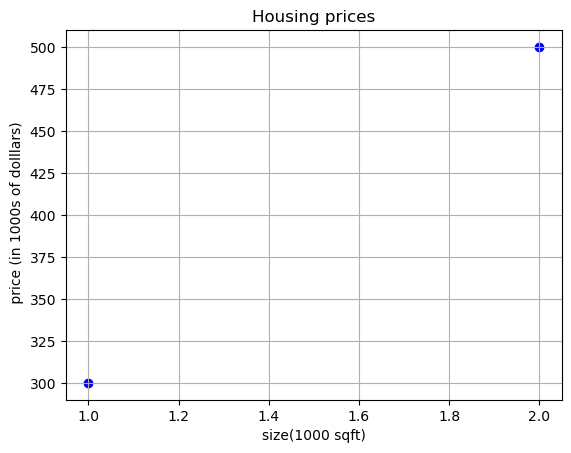

In [55]:
plt.scatter(x_train,y_train,marker = 'o', c  = 'b') # marker is shape like o - circle, s- square and c = 'b' show color like blue
plt.title("Housing prices")
plt.xlabel("size(1000 sqft)")
plt.ylabel(" price (in 1000s of dolllars)")
plt.grid()
plt.show()

### Model function
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b\tag{1} $$

In [83]:
w = b = 200 # fro different w , b plot of graph changes
def model_Output(x,w,b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

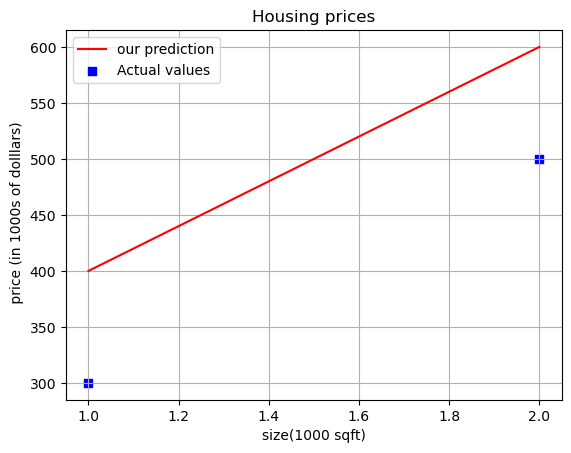

In [85]:
tempf_wb = model_Output(x_train,w,b)
plt.plot(x_train,tempf_wb, c = 'r', label = 'our prediction')
plt.scatter(x_train, y_train, marker = 's', c = 'b', label = 'Actual values')
plt.title("Housing prices")
plt.xlabel("size(1000 sqft)")
plt.ylabel(" price (in 1000s of dolllars)")
plt.legend()
plt.grid()
plt.show()

## Cost Function

In [88]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

### Computing Cost
The equation for the cost in one variable:
$$J(w,b) \frac{1}{2m} \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$
These difference are summed over all the m  example 